DBscan is also Used for Anomaly Detection

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors

In [6]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [7]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\TEJKIRAN\AppData\Local\Temp\ipykernel_45860\4162933600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\TEJKIRAN\AppData\Local\Temp\ipykernel_45860\4162933600.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\TEJKIRAN\AppData\Local\Temp\ipykernel_45860\4162933600.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [15]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


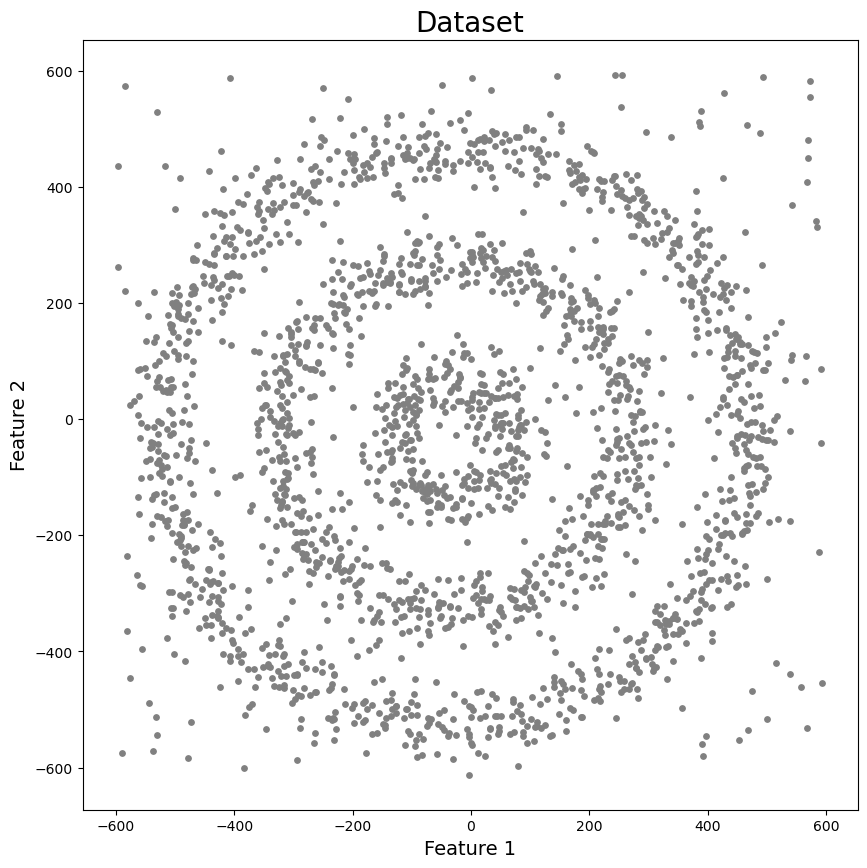

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<b>K-Means</b>

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [18]:
df['KMeans_labels'] = kmeans.labels_

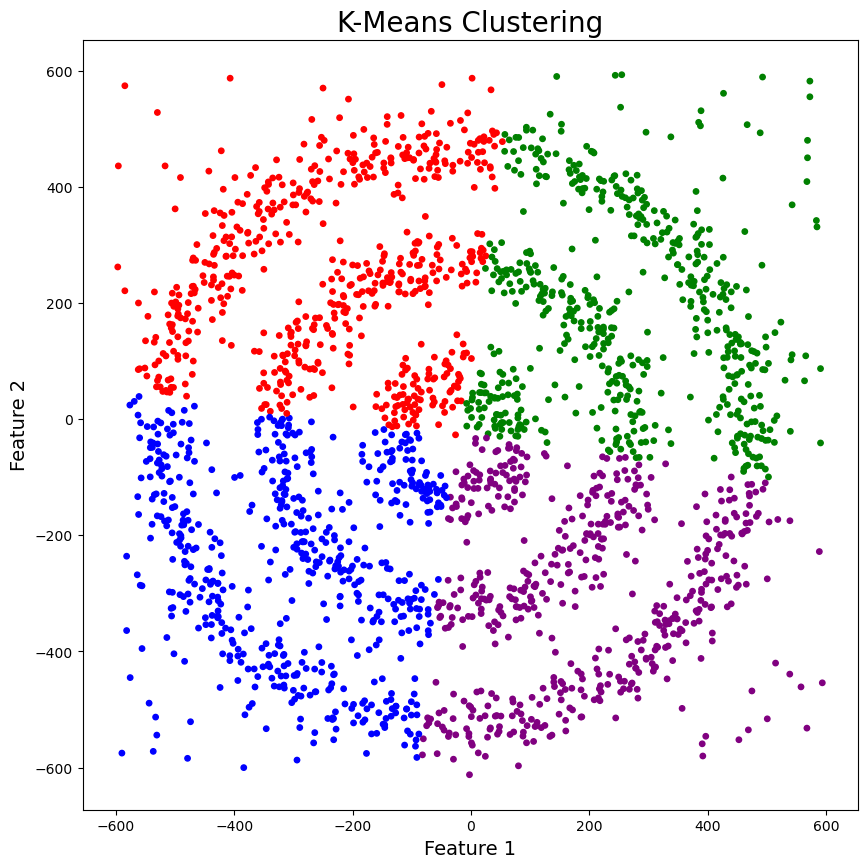

In [55]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [27]:
import numpy as np

# Extract unique cluster labels
unique_labels = np.unique(df['KMeans_labels'])

# Create a dictionary to map labels to colors
label_color_map = dict(zip(unique_labels, colors))

# Print the mapping
for label, color in label_color_map.items():
    print(f"Cluster label {label} is assigned the color {color}")


Cluster label 0 is assigned the color purple
Cluster label 1 is assigned the color red
Cluster label 2 is assigned the color blue
Cluster label 3 is assigned the color green


<b>Hierarchical Clustering</b>

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df)

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AgglomerativeClustering(n_clusters=4)

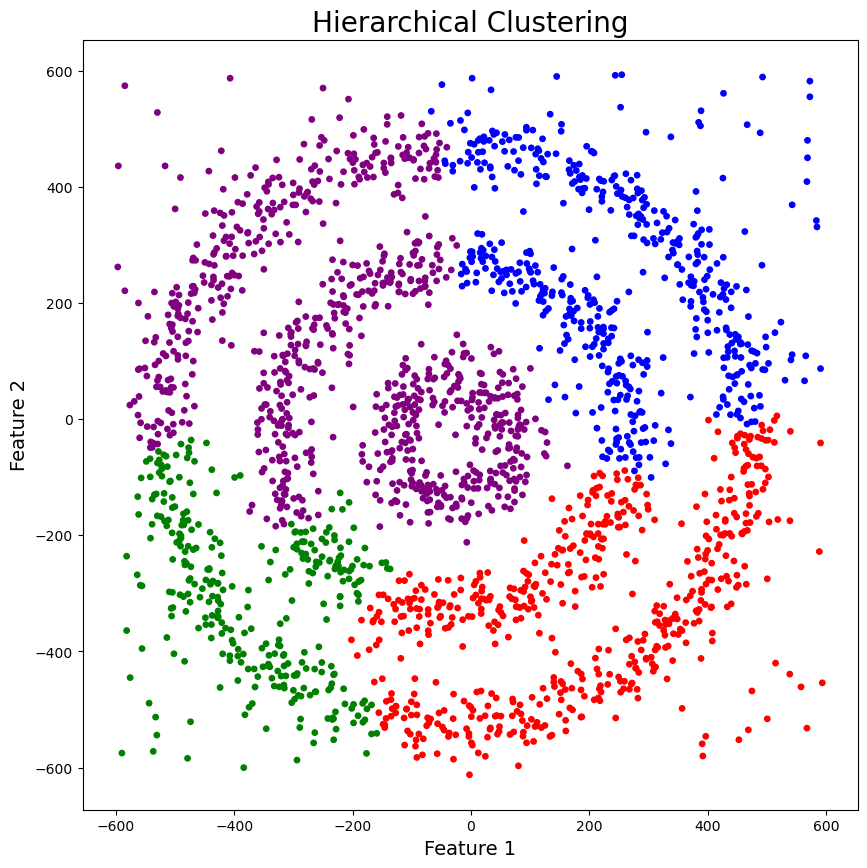

In [54]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Both K means and Hierarchical Clustering failed to cluster properly. Let me try with DBscan. I hope it will classify the data points properly

<b>DBSCAN Clustering</b>

Let’s first run DBSCAN without any parameter optimization and see the results.

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df)

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DBSCAN()

Here, epsilon is 0.5, and min_samples or minPoints is 5. 

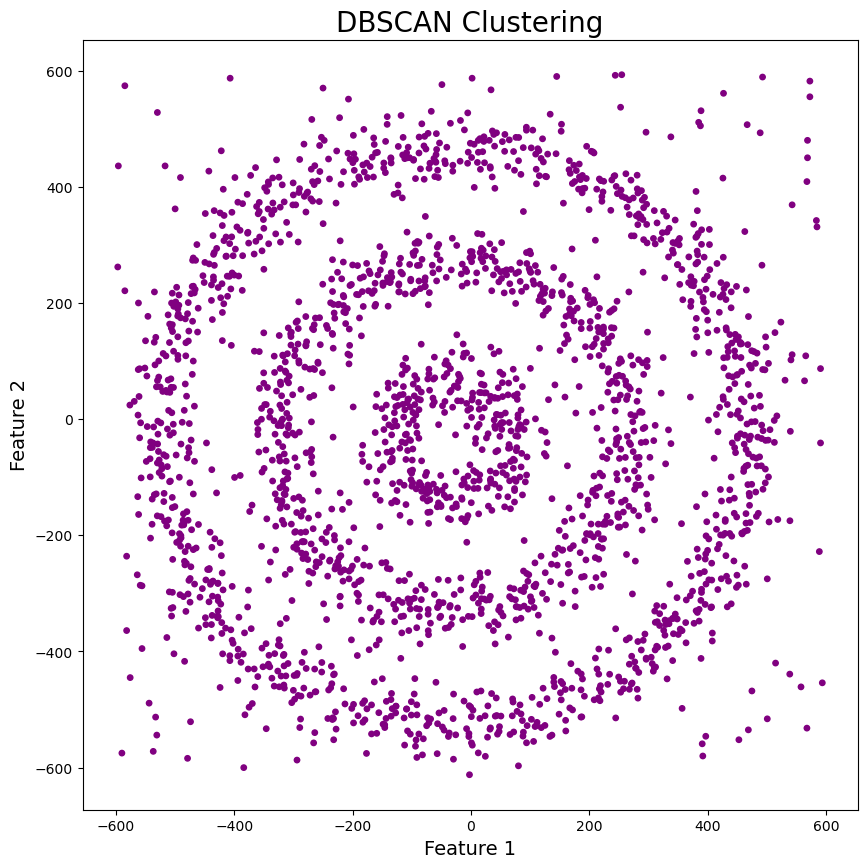

In [53]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.<br>
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [59]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
distances

array([[ 0.        ,  6.91861074, 12.31149451, 14.24353287, 14.35015167,
        14.85543531],
       [ 0.        , 10.80836526, 19.01534865, 24.14726459, 27.62122395,
        28.73385737],
       [ 0.        ,  7.56030267,  9.95689913, 10.74785574, 12.42967868,
        13.40554009],
       ...,
       [ 0.        , 25.77071121, 34.73183904, 40.22760499, 44.27830539,
        46.06359382],
       [ 0.        , 23.34523506, 37.21558813, 67.26812024, 72.83543094,
        81.60882305],
       [ 0.        , 37.73592453, 52.17278984, 60.18698463, 75.37922861,
        85.88473632]])

The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

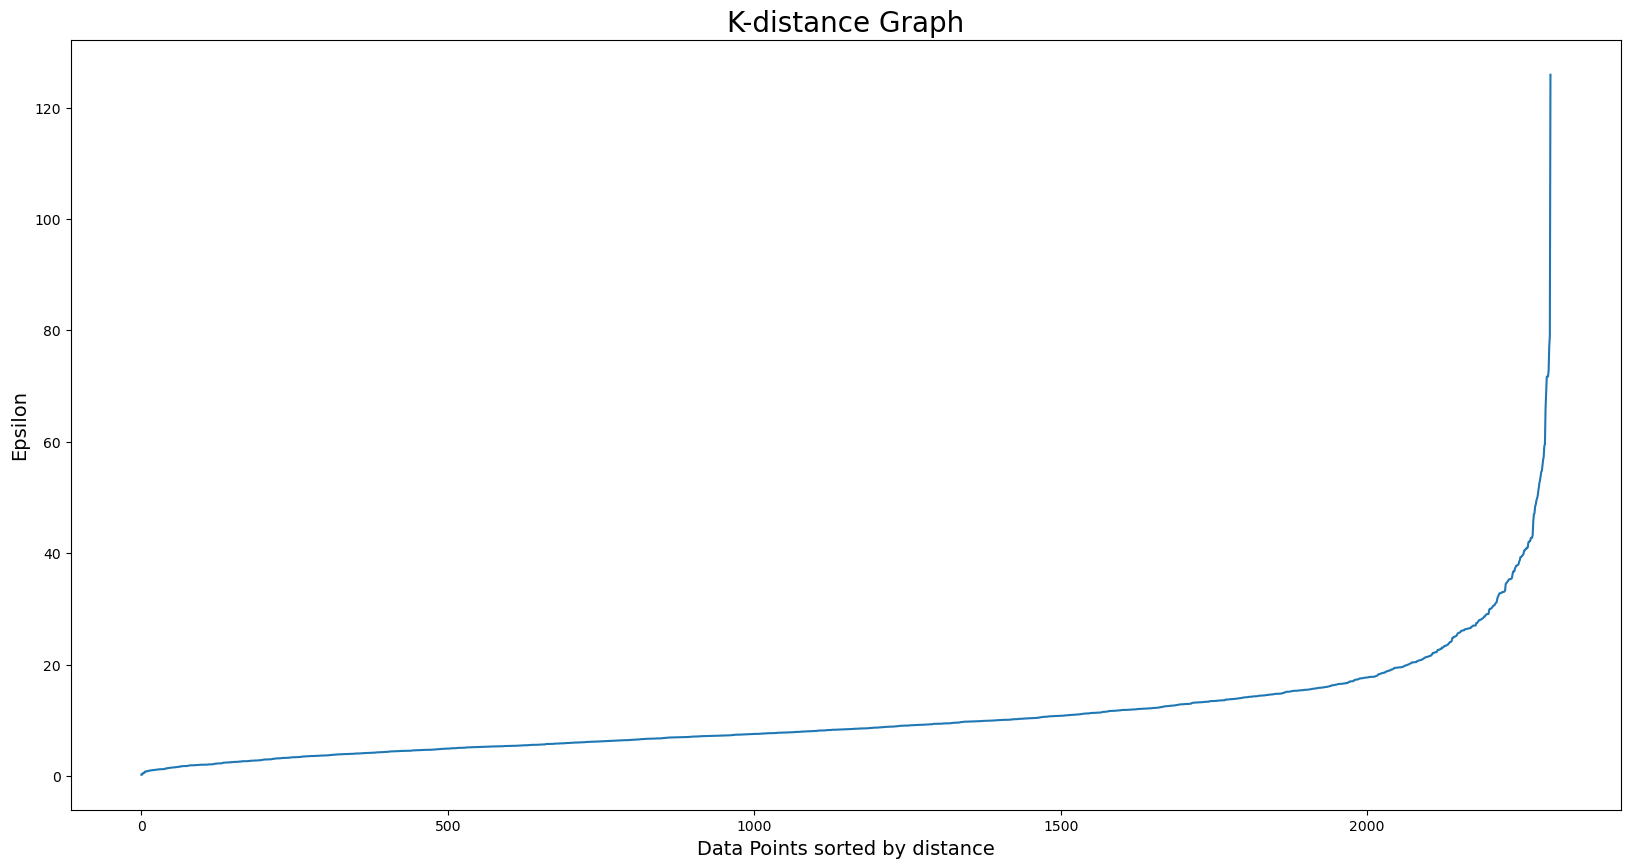

In [61]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case.<br> 
Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [51]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df)
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

 Here, 0, 1 and 2 are the three different clusters, and -1 is the noise

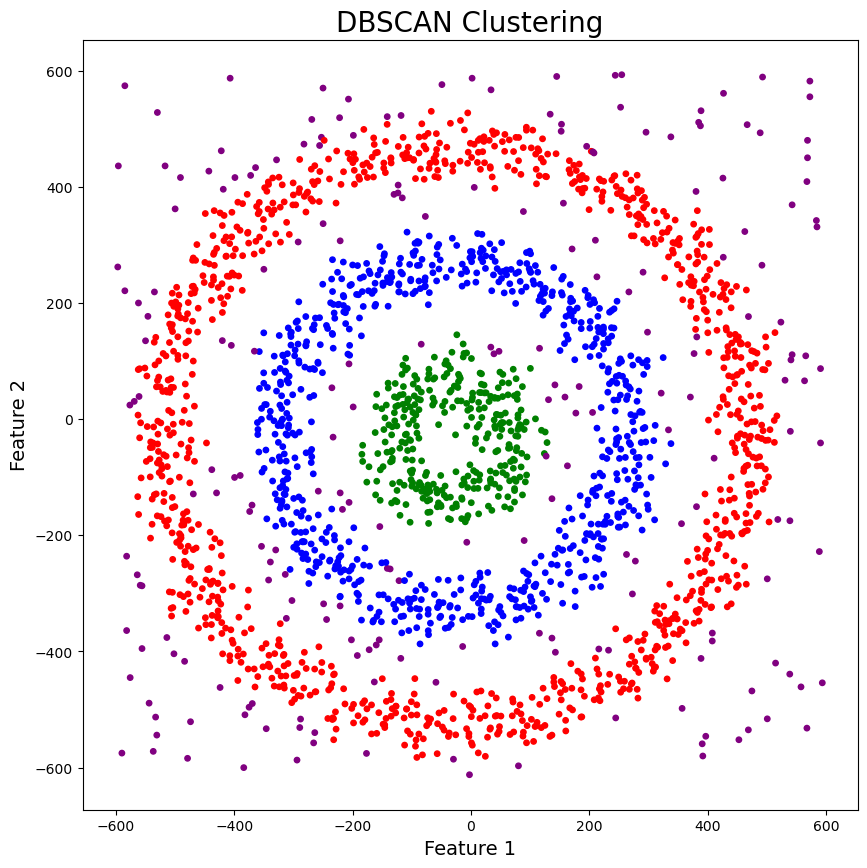

In [52]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

DBSCAN amazingly clustered the data points into three clusters, and it also detected noise in the dataset represented by the purple color.

One thing important to note here is that, though DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.